In this **worksheet** we will try to simulated two integrate and fire neurons. Most of the code will be supplied to you, but you will be asked to fill in some gaps and to look at what happens when some parameters are changed.

----


We want to look at two neurons, but lets start with one. First we need to remind ourselves how to plot things! In this code we will load the ploting library and plot the function "v=sin(t)". This uses two libraries, the first "numpy" contains lots of stuff that is useful for mathematics, for example, the definition of sine. Here the library is imported and given the short name "np". Next two objects are defined, `t` and `v`. `t` first: `np.linspace(0,10,1000)` makes a big list of times starting at 0 and ending at 10 with a 1000 points in between. For `v` it makes another big list it makes by taking each t value and applying sine to it.

After that there is lots of plotting stuff, the basic command is plot that plots t against v, the rest does stuff like setting the size, 6 inches by 4 inches, absurdly matplotlib the plotting library uses inches.

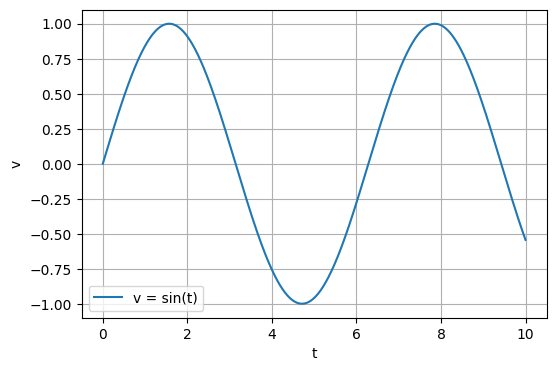

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time range from 0 to 10
t = np.linspace(0, 10, 1000)

# Define the function v = sin(t)
v = np.sin(t)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(t, v, label='v = sin(t)')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()

Run this code and try making some changes; for example change sine to cosine and make it span 0 to 20 instead of 0 to 10.

----

Now lets do some numberical solving of the differential equation; in Python there are, of course, libraries for solving differential equations. When there are libraries available, you should try to use them, using a library usual results in faster and more efficient code and code which is easier for other people to use. However, here, we will solve the differential equation by implementing the Euler appoximation ourselves; this is for two reasons, the main one is educational, so you can see what is happening, the other is practical, the reset that will form part of the integrate and fire neuron, is complicated to implement using a library.

----

This code integrates the equation *df/dt = -f* for different values of *f*. Thing carefully about what the loop is doing! `f[t_index]` gives the `t_index`th entry in the list `f`, where zero is the first entry. The loop doesn't do anything to the first entry but all the other ones it replaces using the formula `f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])` which corresponds to the Euler approximation.

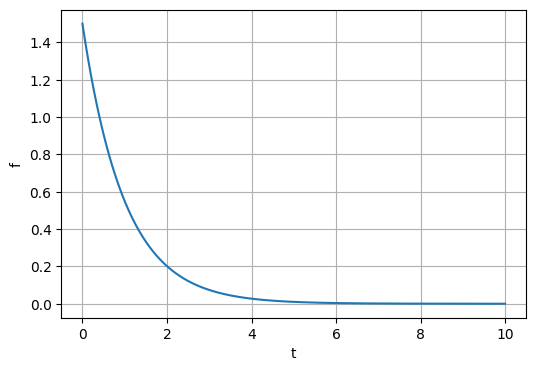

In [9]:
def dfdt(f):
  return -f

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()



The `f = np.full_like(t, f0)` just makes a list the same size as the `t` list but with the value `f0` for each entry.

Next change this so that the differential equation is *df/dt = 10-f*

In [ ]:
def dfdt(f):
  ### add your code here ###
  return ##some value###

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-8-e25fa7bcd0bd>, line 4)

Now we want a `if` statement. To give the syntax look at this:

In [ ]:
f=10
print(f)
if f>5:
  f=0
print(f)

10
0


Lets add an if statement so that whenever `f` exceeds `threshold=5.0` it resets to 1.5. We will repeat some parts of the code needlessly, the notebook does remember stuff from earlier cells, but it is nice to keep it all together.

In [ ]:
def dfdt(f):
### add your code here ###

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)
threshold=5.0 # note that I've added this

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])
  # use an if to check if f[t_index] is bigger than threshold
  # and if it is, reset it to f0

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Next we want to start setting up a neuronal simulator. Lets reproduce the figure in the notes. First lets set some values, when you are writing code it is useful to avoid "hard coding", that is writing numbers directly into the code, it can make it difficult to change values later. We are going to be simulating the differential equation tau dv/dt = el + ri - v where we are using el for the leak, ri for the input including the resistance and tau for the timescale. I will add that and you should take the code for *df/dt=1-f* above and adopt it to do the integrate and fire equation.

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
ri = 12  # mV, different values of R_m * I_e

t_start=0.0
t_end=100.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el
v=np.full_like(t, v0)

def diff_eq(v, t, ri, el, tau):
    return ### put the differential equation here

### simulate the neuron and plot it


You should try changing the ri value to 16 as well.
_____

Now lets try and do two neurons in one graph, I am going to show you how to do it for the simpler example above, the one with the *f*. Here I am going to make a list called `all_f` which contains two `f`'s, each will have its own value of tau so we are solving the equation *tau df/dt=10-f* for two values of *tau*. The list `all_f` will hold both `f`s, so it will be a list of lists.

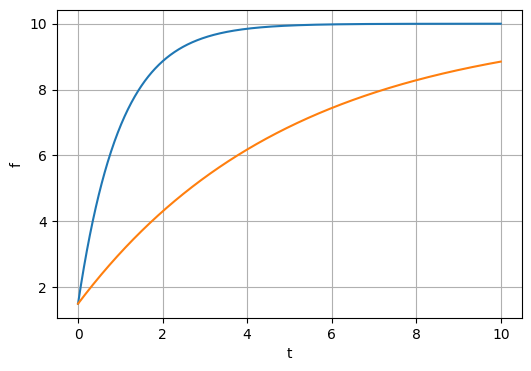

In [12]:
def dfdt(f,tau):
  return (10-f)/tau

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
all_tau = [1.0,5.0]
all_f = [np.full_like(t, f0),np.full_like(t, f0)]

for t_index in range(1,n_points):
  for f_index in range(len(all_f)):
    f=all_f[f_index]
    tau=all_tau[f_index]
    f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1],tau)

plt.figure(figsize=(6, 4))
plt.plot(t, all_f[0])
plt.plot(t, all_f[1])
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Now do the same thing, but for two neurons, one with `ri=12` and the other `ri=16`

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
all_ri = [12,16]  # mV, different values of R_m * I_e

t_start=0.0
t_end=100.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el
all_v=[np.full_like(t, v0),p.full_like(t, v0)]

def diff_eq(v, t, ri, el, tau):
    return ### put the differential equation here

### simulate the neurons and plot them
